#### 薪资
公司规模对于薪资的影响
公司地址对薪资的影响
工作经验对薪资的影响
学历对薪资的影响
#### 工作机会
公司规模对于工作机会的影响
公司地址对工作机会的影响
工作经验对工作机会的影喊
学历对工作机会的影响
技能要求对工作机会的影响

#### 1.导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./work_all_2.xls')

In [3]:
df

,job_title,company,person_number,salary,path,work,edu,skill
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析
...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,150-200/天,福州-鼓楼,无经验,本科,JavaOracle
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase


#### 2.观测数据

##### 大概看一下数据情况

In [4]:
df.head()

,job_title,company,person_number,salary,path,work,edu,skill
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析


##### 数据表情况
 person_number、skill 有缺失值

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_title      3675 non-null   object
 1   company        3675 non-null   object
 2   person_number  3580 non-null   object
 3   salary         3675 non-null   object
 4   path           3675 non-null   object
 5   work           3675 non-null   object
 6   edu            3675 non-null   object
 7   skill          3672 non-null   object
dtypes: object(8)
memory usage: 229.8+ KB


##### 查看缺失值情况
填充or删除

In [6]:
df.isnull()

,job_title,company,person_number,salary,path,work,edu,skill
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3670,False,False,False,False,False,False,False,False
3671,False,False,False,False,False,False,False,False
3672,False,False,False,False,False,False,False,False
3673,False,False,False,False,False,False,False,False


##### 每一列的缺失值个数

In [7]:
df.isnull().sum()

job_title         0
company           0
person_number    95
salary            0
path              0
work              0
edu               0
skill             3
dtype: int64

##### 空值的比例

skill空值比例很少 直接删除不影响
而person_number数据更适合填充

In [8]:
df.isnull().mean()

job_title        0.000000
company          0.000000
person_number    0.025850
salary           0.000000
path             0.000000
work             0.000000
edu              0.000000
skill            0.000816
dtype: float64

#### 3.空值处理

skill

In [9]:
df.dropna(subset=['skill'],inplace=True)

In [10]:
df.shape

(3672, 8)

person_number

In [11]:
# 从统计学
df.person_number

0           20-99人 
1           20-99人 
2         100-299人 
3           20-99人 
4         100-299人 
           ...     
3670      500-999人 
3671    1000-9999人 
3672        20-99人 
3673        20-99人 
3674    1000-9999人 
Name: person_number, Length: 3672, dtype: object

离散数据、字符串
--> 众数

In [12]:
df.person_number.unique()

array(['20-99人 ', '100-299人 ', '300-499人 ', '1000-9999人 ', nan,
       '500-999人 ', '10000人以上 ', '20人以下 '], dtype=object)

计算众数

取第一个众数

In [13]:
person_n_m = df.person_number.mode()[0]

In [14]:
person_n_m

'20-99人 '

In [15]:
df.fillna('20-99人 ')

,job_title,company,person_number,salary,path,work,edu,skill
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析
...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,150-200/天,福州-鼓楼,无经验,本科,JavaOracle
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3674
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_title      3672 non-null   object
 1   company        3672 non-null   object
 2   person_number  3577 non-null   object
 3   salary         3672 non-null   object
 4   path           3672 non-null   object
 5   work           3672 non-null   object
 6   edu            3672 non-null   object
 7   skill          3672 non-null   object
dtypes: object(8)
memory usage: 258.2+ KB


In [17]:
df

,job_title,company,person_number,salary,path,work,edu,skill
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析
...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,150-200/天,福州-鼓楼,无经验,本科,JavaOracle
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase


#### 4.数据处理

薪资区间 --> 拆成两列


In [18]:
df.salary.unique()

array(['1.2万-1.8万', '1.2万-2万', '2万-3.5万', '8千-1.5万', '1万-1.5万', '8千-1.2万',
       '7千-9千', '1万-1.8万', '7千-1.4万', '1.5万-2万', '1.2万-1.5万', '1.3万-1.5万',
       '8千-1.4万', '6千-1.2万', '7千-1万', '6千-1万', '6千-8千', '8千-1.3万',
       '1万-1.3万', '8千-1万', '9千-1.2万', '面议', '6千-9千', '1.8万-2.5万',
       '8千-1.6万', '1.3万-2.3万', '1.5万-2.5万', '1.1万-2万', '1.3万-1.8万',
       '1.5万-3万', '1.2万-2.4万', '9千-1.4万', '1.5万-2.2万', '1.6万-2.3万',
       '2万-3万', '1万-2万', '1.2万-2.2万', '2.5万-3万', '4万-6万', '1.7万-2万',
       '1.6万-2.5万', '9千-1.8万', '1.3万-2.6万', '1.6万-1.8万', '1万-1.6万',
       '1.4万-1.8万', '1.8万-2万', '1.5万-1.8万', '1.5万-2.1万', '2.5万-3.5万',
       '1.8万-3万', '3.5万-4万', '2万-4万', '1.1万-1.5万', '7千-8千', '5千-8千',
       '6千-7千', '5千-1万', '4千-6千', '5千-6千', '1万-1.4万', '7千-1.2万', '5千-7千',
       '4千-8千', '9千-1万', '1万-1.2万', '3万-6万', '9千-1.1万', '2.8万-4万',
       '1.3万-1.6万', '2.5万-4.5万', '1.5万-2.6万', '1.7万-2.5万', '2.5万-2.6万',
       '3万-5万', '8千-9千', '7千-1.1万', '1.3万-2万', '1.2万-1.7万', '1.5万-2.3万',
       '9千-1.3万', '

'面议'的替换
计算薪资众数

In [19]:
salary_m = df.salary.mode()[0]

In [20]:
salary_m

'1万-1.5万'

In [21]:
df.salary = df.salary.str.replace('面议','1万-1.5万')

‘xxx/天’的修改
*22

要从上面的数据看哪些是需要修改的，因为量不多所以可以直接操作而不需要函数

In [22]:
df.salary = df.salary.str.replace('180-240/天','4千-5.2千')
df.salary = df.salary.str.replace('100-150/天','2.2千-3.3千')
df.salary = df.salary.str.replace('150-200/天','3.3千-4.4千')
df.salary = df.salary.str.replace('190-200/天','4千-4.4千')
df.salary = df.salary.str.replace('100-200/天','2.2千-4.4千')

In [23]:
df.salary.unique()

array(['1.2万-1.8万', '1.2万-2万', '2万-3.5万', '8千-1.5万', '1万-1.5万', '8千-1.2万',
       '7千-9千', '1万-1.8万', '7千-1.4万', '1.5万-2万', '1.2万-1.5万', '1.3万-1.5万',
       '8千-1.4万', '6千-1.2万', '7千-1万', '6千-1万', '6千-8千', '8千-1.3万',
       '1万-1.3万', '8千-1万', '9千-1.2万', '6千-9千', '1.8万-2.5万', '8千-1.6万',
       '1.3万-2.3万', '1.5万-2.5万', '1.1万-2万', '1.3万-1.8万', '1.5万-3万',
       '1.2万-2.4万', '9千-1.4万', '1.5万-2.2万', '1.6万-2.3万', '2万-3万', '1万-2万',
       '1.2万-2.2万', '2.5万-3万', '4万-6万', '1.7万-2万', '1.6万-2.5万', '9千-1.8万',
       '1.3万-2.6万', '1.6万-1.8万', '1万-1.6万', '1.4万-1.8万', '1.8万-2万',
       '1.5万-1.8万', '1.5万-2.1万', '2.5万-3.5万', '1.8万-3万', '3.5万-4万',
       '2万-4万', '1.1万-1.5万', '7千-8千', '5千-8千', '6千-7千', '5千-1万', '4千-6千',
       '5千-6千', '1万-1.4万', '7千-1.2万', '5千-7千', '4千-8千', '9千-1万',
       '1万-1.2万', '3万-6万', '9千-1.1万', '2.8万-4万', '1.3万-1.6万', '2.5万-4.5万',
       '1.5万-2.6万', '1.7万-2.5万', '2.5万-2.6万', '3万-5万', '8千-9千', '7千-1.1万',
       '1.3万-2万', '1.2万-1.7万', '1.5万-2.3万', '9千-1.3万', '1.2万-1.6万',
 

列的拆分

In [24]:
df[['min_salary','max_salary']] = df.salary.str.split('-',2,expand=True)

E:\Users\panyue\AppData\Local\Temp\ipykernel_19744\2101421389.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['min_salary','max_salary']] = df.salary.str.split('-',2,expand=True)


In [25]:
df

,job_title,company,person_number,salary,path,work,edu,skill,min_salary,max_salary
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,1.2万,1.8万
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,1.2万,2万
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,2万,3.5万
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,8千,1.5万
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,1万,1.5万
...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3.3千,4.4千
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,8千,1.4万
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,1万,1.8万
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,1.3万,1.8万


 转化成数值型数据

In [26]:
def handle (salary):
    if type(salary) == str:
        if salary[-1] == '万':
            salary = float(salary[:-1])*10000
        elif salary[-1] == '千':
            salary = float(salary[:-1])*1000
        else:
            salary = float(salary)
    return salary

In [27]:
df.min_salary = df.min_salary.map(lambda salary : handle(salary))
df.max_salary = df.max_salary.map(lambda salary : handle(salary))

In [28]:
df

,job_title,company,person_number,salary,path,work,edu,skill,min_salary,max_salary
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,12000.0,18000.0
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,12000.0,20000.0
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,20000.0,35000.0
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,8000.0,15000.0
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,10000.0,15000.0
...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3300.0,4400.0
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,8000.0,14000.0
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,10000.0,18000.0
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,13000.0,18000.0


平均薪资

In [29]:
df['avg_salary']= (df.min_salary+df.max_salary)/2

In [30]:
df

,job_title,company,person_number,salary,path,work,edu,skill,min_salary,max_salary,avg_salary
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,12000.0,18000.0,15000.0
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,12000.0,20000.0,16000.0
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,20000.0,35000.0,27500.0
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,8000.0,15000.0,11500.0
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,10000.0,15000.0,12500.0
...,...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3300.0,4400.0,3850.0
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,8000.0,14000.0,11000.0
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,10000.0,18000.0,14000.0
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,13000.0,18000.0,15500.0


##### 查看avg_salary 数据分布情况

In [31]:
df.avg_salary.describe()

count      3672.000000
mean      12722.657952
std        7505.179722
min        2500.000000
25%        8500.000000
50%       11500.000000
75%       15000.000000
max      245000.000000
Name: avg_salary, dtype: float64

有离谱的数据出现 --> 画图看看

很明显数据是不健康的

<Axes: >

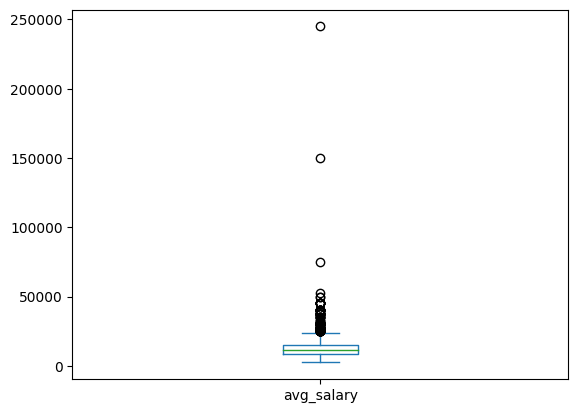

In [32]:
df.avg_salary.plot(kind='box')

##### 剔除不健康数据

先看看前99%数据的最大值是否合理

In [33]:
df.avg_salary.describe([.99])

count      3672.000000
mean      12722.657952
std        7505.179722
min        2500.000000
50%       11500.000000
99%       35000.000000
max      245000.000000
Name: avg_salary, dtype: float64

In [34]:
max_num =  df.avg_salary.describe([.99])['99%']

筛选数据 --> 只要最大值之下的

In [35]:
df = df[df.avg_salary<max_num]

In [36]:
df

,job_title,company,person_number,salary,path,work,edu,skill,min_salary,max_salary,avg_salary
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,12000.0,18000.0,15000.0
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,12000.0,20000.0,16000.0
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,20000.0,35000.0,27500.0
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,8000.0,15000.0,11500.0
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,10000.0,15000.0,12500.0
...,...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3300.0,4400.0,3850.0
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,8000.0,14000.0,11000.0
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,10000.0,18000.0,14000.0
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,13000.0,18000.0,15500.0


<Axes: >

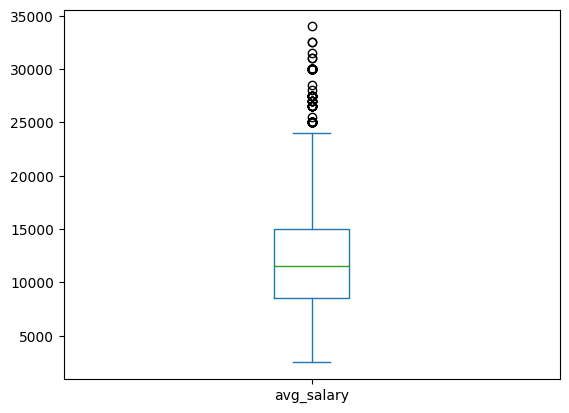

In [37]:
df.avg_salary.plot(kind='box')

删除没用的数据列

In [38]:
df.drop(columns=['min_salary','salary','max_salary'],inplace=True)

E:\Users\panyue\AppData\Local\Temp\ipykernel_19744\2683504681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['min_salary','salary','max_salary'],inplace=True)


In [39]:
df

,job_title,company,person_number,path,work,edu,skill,avg_salary
0,数据分析师,北京与车行信息技术有限公司,20-99人,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,15000.0
1,数据处理工程师,南京思影科技有限公司,20-99人,北京-石景山,不限,本科,MATLABPython机器学习神经网络,16000.0
2,数据分析,北京中关村科技融资担保有限公司,100-299人,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,27500.0
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,11500.0
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,北京-朝阳,1-3年,本科,舆情分析运营数据分析,12500.0
...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,福州-鼓楼,无经验,本科,JavaOracle,3850.0
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,福州,3-5年,本科,数据仓库,11000.0
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,14000.0
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,15500.0


In [40]:
df.path.unique()

array(['北京-朝阳', '北京-石景山', '北京', '北京-海淀', '北京-东城', '北京-丰台', '北京-西城',
       '北京-昌平', '北京-顺义', '北京-通州', '北京-大兴', '北京-延庆', '北京-密云', '上海-宝山',
       '上海-杨浦', '上海-嘉定', '上海-徐汇', '上海-浦东', '上海-普陀', '上海-闵行', '上海-黄浦',
       '上海-金山', '上海', '上海-静安', '上海-松江', '上海-长宁', '上海-虹口', '上海-青浦',
       '广州-海珠', '广州-番禺', '广州-黄埔', '广州-天河', '广州', '广州-白云', '广州-越秀',
       '广州-南沙', '广州-荔湾', '广州-花都', '深圳-宝安', '深圳-龙岗', '深圳', '深圳-南山',
       '深圳-罗湖', '深圳-福田', '深圳-龙华', '深圳-坪山', '深圳-光明', '武汉-江夏', '武汉-武昌',
       '武汉-硚口', '武汉-江汉', '武汉', '武汉-黄陂', '武汉-洪山', '武汉-江岸', '武汉-东西湖',
       '武汉-蔡甸', '武汉-汉阳', '武汉-东湖高新区', '武汉-新洲', '武汉-汉南', '西安-雁塔', '西安-未央',
       '西安-新城', '西安-高新区', '西安', '西安-灞桥', '西安-莲湖', '西安-长安', '西安-碑林',
       '西安-国际港务区', '西安-鄠邑', '成都-锦江', '成都-武侯', '成都-双流', '成都', '成都-青羊',
       '成都-金牛', '成都-温江', '成都-成华', '成都-新都', '成都-郫都', '成都-崇州', '成都-龙泉驿',
       '成都-高新区', '成都-天府新区', '大连-甘井子', '大连-中山', '大连-西岗', '大连', '大连-沙河口',
       '大连-金州', '大连-普兰店', '大连-庄河', '大连-高新园区', '大连-旅顺口', '长春-榆树', '长春-朝阳',
       '长春', '长春-南关', '长春

##### 处理地址

只要城市，不要区

In [41]:
df['city'] = df.path.str[:2]

E:\Users\panyue\AppData\Local\Temp\ipykernel_19744\104618365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df.path.str[:2]


In [42]:
df

,job_title,company,person_number,path,work,edu,skill,avg_salary,city
0,数据分析师,北京与车行信息技术有限公司,20-99人,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,15000.0,北京
1,数据处理工程师,南京思影科技有限公司,20-99人,北京-石景山,不限,本科,MATLABPython机器学习神经网络,16000.0,北京
2,数据分析,北京中关村科技融资担保有限公司,100-299人,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,27500.0,北京
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,11500.0,北京
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,北京-朝阳,1-3年,本科,舆情分析运营数据分析,12500.0,北京
...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,福州-鼓楼,无经验,本科,JavaOracle,3850.0,福州
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,福州,3-5年,本科,数据仓库,11000.0,福州
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,14000.0,福州
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,15500.0,福州


In [43]:
df.city.unique()

array(['北京', '上海', '广州', '深圳', '武汉', '西安', '成都', '大连', '长春', '沈阳', '南京',
       '济南', '青岛', '杭州', '苏州', '无锡', '宁波', '重庆', '郑州', '长沙', '福州'],
      dtype=object)

#### 5.分组转换

##### 学历对薪资的影响

group by（）

In [44]:
edu_salary = df.groupby(by='edu')

In [45]:
edu_salary

In [46]:
for i in edu_salary:
    print(i)

('中专/中技',            job_title         company person_number    path  work    edu  \
679    初级数据分析师（包吃两餐）    广州市爱莲化妆品有限公司       20-99人       广州    不限  中专/中技   
1035          大数据分析师      深圳楠北科技有限公司        20人以下    深圳-宝安    不限  中专/中技   
1544           数据分析师    四川时代众盈科技有限公司       20-99人       成都  1-3年  中专/中技   
1808         数据分析师助理    辉云(大连)科技有限公司       20-99人   大连-甘井子    不限  中专/中技   
1855        人工智能数据专员    辉云(大连)科技有限公司       20-99人   大连-甘井子    不限  中专/中技   
2246            贷款经理  南京未来可期信息咨询有限公司     500-999人    南京-玄武    不限  中专/中技   
2662  数据分析助理、六险一金+提成    绍兴拓风信息科技有限公司     100-299人       杭州    不限  中专/中技   
2910    双休月8K管理人员非销售     盐城市派农商贸有限公司           NaN   无锡-梁溪  1-3年  中专/中技   

                              skill  avg_salary city  
679   数据分析数据监控数据挖掘PythonSQLSPSS相关分析      6000.0   广州  
1035             Python商业数据分析游戏数据分析     21500.0   深圳  
1544             运营数据分析金融数据分析风控数据分析     10500.0   成都  
1808                           Java      5000.0   大连  
1855               回归分析相关分析效度分析参数检验    

In [47]:
edu_salary = df.groupby(by='edu').avg_salary

In [48]:
for i in edu_salary:
    print(i)

('中专/中技', 679      6000.0
1035    21500.0
1544    10500.0
1808     5000.0
1855     5000.0
2246    22500.0
2662    15500.0
2910     7500.0
Name: avg_salary, dtype: float64)
('博士', 1778    25000.0
2017    20000.0
2021    25000.0
2399    30000.0
2404    30000.0
2898    30000.0
Name: avg_salary, dtype: float64)
('大专', 3       11500.0
5       10000.0
8       10000.0
9       10500.0
10      12500.0
         ...   
3635     7500.0
3636     5500.0
3664    10000.0
3668    15000.0
3673    15500.0
Name: avg_salary, Length: 1057, dtype: float64)
('学历不限', 195     11500.0
217     12500.0
266      5500.0
350     12500.0
364     12500.0
421      7500.0
500      9500.0
691      8000.0
712     17000.0
788     18000.0
810      9000.0
1014    12000.0
1237    16500.0
1246     9000.0
1280    11500.0
1447     3500.0
1454    13000.0
1480    16500.0
1663    14500.0
1707    23500.0
1821     6000.0
1836     6500.0
1885    21500.0
1896    12500.0
1945    10500.0
1971    10500.0
2106     5500.0
2460    20000.0
248

##### 各学历区间最高薪资比较

最大值本来就是极端值 --> 学历要求时最低学历要求
多思考市场需求 学历下限太高会怎么样

In [49]:
edu_salary_max = edu_salary.max()

In [50]:
edu_salary_max

edu
中专/中技    22500.0
博士       30000.0
大专       25000.0
学历不限     23500.0
本科       34000.0
硕士       30000.0
高中       11500.0
Name: avg_salary, dtype: float64

In [51]:
#配置字体参数雅黑
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
#安装字体
plt.rcParams['font.sans-serif'] = 'SimHei'
#配置矢量图
%config InlineBackend.figure_format = 'svg'

<Axes: xlabel='edu'>

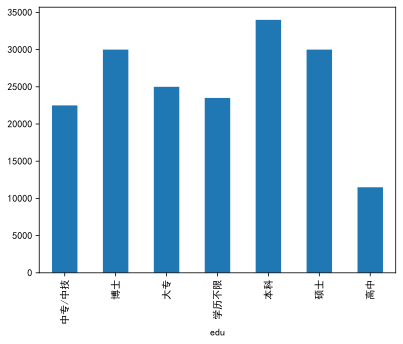

In [52]:
edu_salary_max.plot(kind = 'bar')

取平均数

In [53]:
edu_salary_avg = edu_salary.mean()

<Axes: xlabel='edu'>

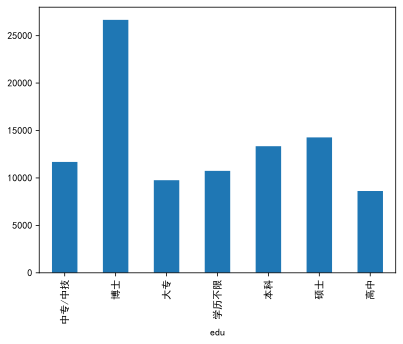

In [54]:
edu_salary_avg.plot(kind = 'bar')

##### 不同学历区间工作机会情况

In [55]:
edu_salary_count = edu_salary.count()

In [56]:
edu_salary_count

edu
中专/中技       8
博士          6
大专       1057
学历不限       43
本科       2386
硕士        128
高中          4
Name: avg_salary, dtype: int64

<Axes: xlabel='edu'>

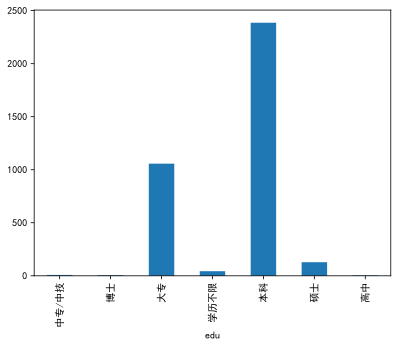

In [57]:
edu_salary_count.plot(kind = 'bar')

换个方法

In [58]:
df.edu.value_counts()

本科       2386
大专       1057
硕士        128
学历不限       43
中专/中技       8
博士          6
高中          4
Name: edu, dtype: int64

##### 城市对薪资的影响

In [59]:
city_salary = df.groupby(by='city').avg_salary

各城市平均薪资 先看平均

In [60]:
city_salary_avg = city_salary.mean().sort_values(ascending=False)

In [61]:
city_salary_avg

city
杭州    14818.652850
南京    14791.921397
苏州    14506.329114
上海    14346.590909
北京    13760.377358
成都    12599.442379
长沙    12581.521739
宁波    12395.348837
西安    12116.744186
武汉    12059.917355
深圳    12016.791045
广州    11834.572491
济南    11704.787234
福州    11326.948052
大连    11067.307692
重庆    10828.676471
长春    10629.032258
无锡    10611.403509
郑州    10169.856459
青岛     9232.824427
沈阳     8916.666667
Name: avg_salary, dtype: float64

类型是Series --> 直接出图 描述性统计信息

In [62]:
type(city_salary_avg)

pandas.core.series.Series

<Axes: xlabel='city'>

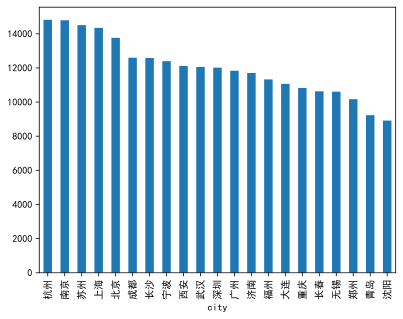

In [63]:
city_salary_avg.plot(kind='bar')

分析一下。还是中位数好

In [64]:
city_salary_med = city_salary.median().sort_values(ascending=False)

<Axes: xlabel='city'>

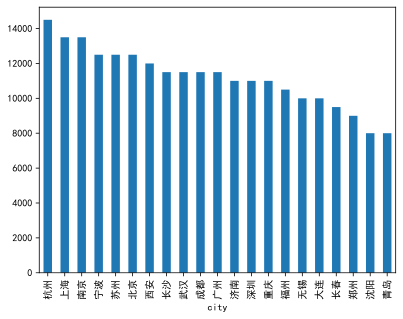

In [65]:
city_salary_med.plot(kind='bar')

取前十

In [66]:
city_salary_med = city_salary.median().sort_values(ascending=False)[:10]

<Axes: xlabel='city'>

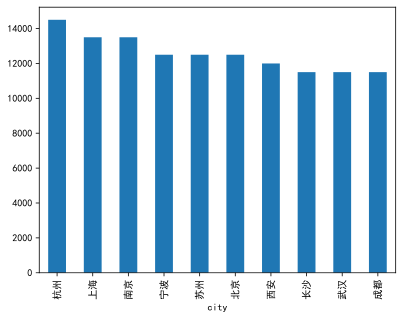

In [67]:
city_salary_med.plot(kind='bar')

In [68]:
city_salary_count = city_salary.count().sort_values(ascending=False)

<Axes: xlabel='city'>

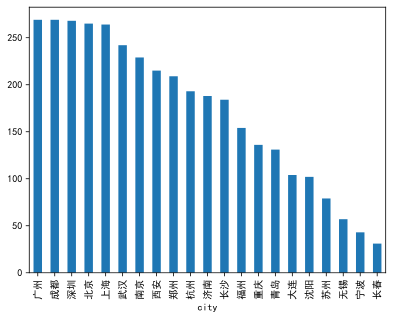

In [69]:
city_salary_count.plot(kind = 'bar')

##### 工作经验对薪资的影响

In [70]:
work_salary = df.groupby(by='work').avg_salary

In [71]:
work_salary_avg = work_salary.mean().sort_values(ascending=False)

<Axes: xlabel='city'>

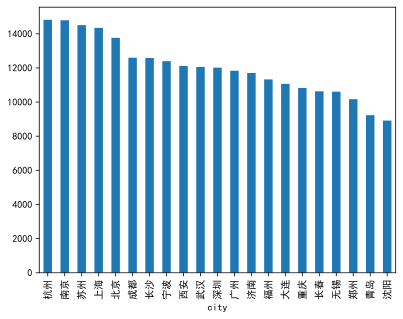

In [72]:
city_salary_avg.plot(kind = 'bar')

In [73]:
work_salary_count = work_salary.count().sort_values(ascending=False)

<Axes: xlabel='city'>

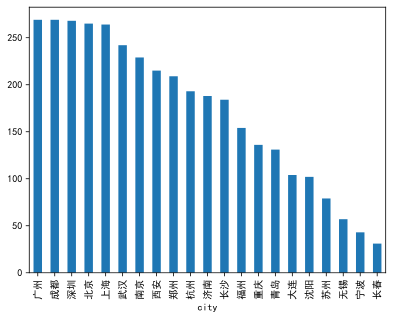

In [74]:
city_salary_count.plot(kind = 'bar')

In [75]:
work_salary_med = work_salary.median().sort_values(ascending=False)

<Axes: xlabel='city'>

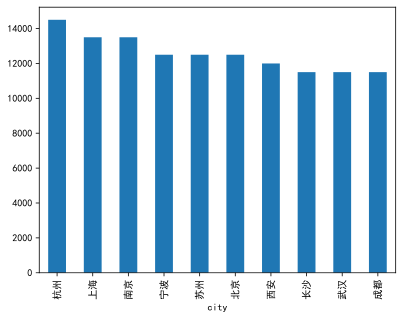

In [76]:
city_salary_med.plot(kind = 'bar')

##### 不同工作经验区间工作机会比较

In [77]:
work_num_count = work_salary.count()
#work_num_count = df.work.value_counts()

<Axes: xlabel='work'>

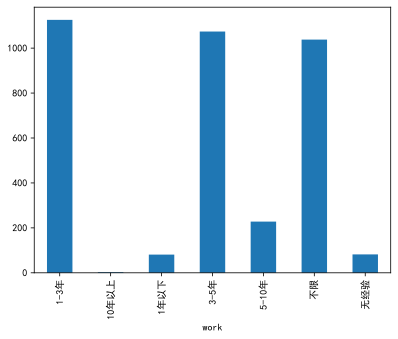

In [78]:
work_num_count.plot(kind = 'bar')

##### 公司规模对于薪资的影响

In [79]:
person_salary = df.groupby(by='person_number').avg_salary

In [80]:
person_salary_avg = person_salary.mean().sort_values(ascending=False)

<Axes: xlabel='person_number'>

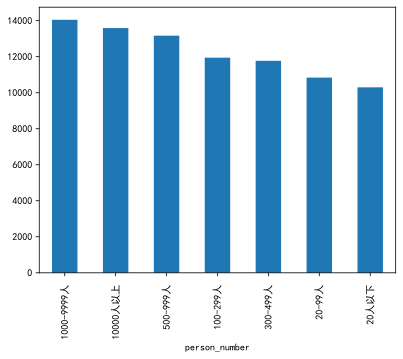

In [81]:
person_salary_avg.plot(kind = 'bar')

In [82]:
person_salary_med = person_salary.median().sort_values(ascending=False).sort_values(ascending=False)

<Axes: xlabel='person_number'>

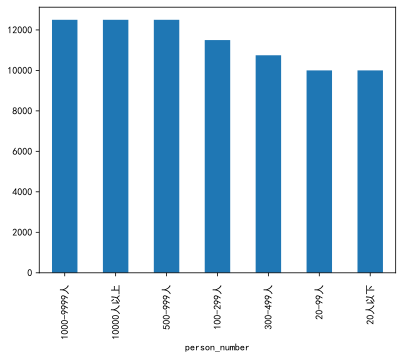

In [83]:
person_salary_med.plot(kind = 'bar')

##### 公司规模对于工作机会的影响

In [84]:
person_num_count = person_salary.count().sort_values(ascending=False)
#person_num_count = df.person.value_counts()

<Axes: xlabel='person_number'>

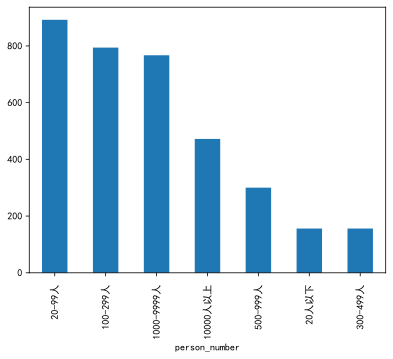

In [85]:
person_num_count.plot(kind = 'bar')

#### skill -->  成员运算

选取一些必要的技能

##### Python

1/3的岗位技能需求有Python

In [86]:
skill_count = df.skill.str.contains('Python').sum()

In [87]:
skill_count

1006

##### 其他

In [88]:
skill_count = pd.Series(data={
    'Python':df.skill.str.contains('Python').sum(),
    'SQL':df.skill.str.contains('SQL').sum(),
    '数据分析':df.skill.str.contains('数据分析').sum(),
    'Excel':df.skill.str.contains('Excel').sum(),
    '机器学习':df.skill.str.contains('机器学习').sum(),
    '数据挖掘':df.skill.str.contains('数据挖掘').sum(),
    '数据仓库':df.skill.str.contains('数据仓库').sum(),
})

In [89]:
skill_count

Python    1006
SQL       1277
数据分析      1448
Excel      104
机器学习        93
数据挖掘       245
数据仓库       124
dtype: int64

<Axes: >

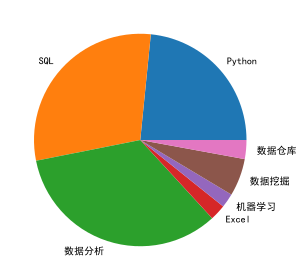

In [90]:
skill_count.plot(kind='pie')

 导入
（1）数据勘测：空值
（2）薪资：拆分 --> 最低最高
（3）处理单位
（4）平均值
观测数据情况 --> 离谱数据 99分位数 取以下
统一量纲 --> 城市

分组处理 不同的维度不同的区分函数